In [120]:
import requests
import math
import io

def slope(x, y):
    sl = math.sqrt(x**2 + y**2)
    return sl

def get_ann(img_path,api_url) -> dict:
    ''' img_path : str or PIL image '''
    if type(img_path) == str:
        file_dict = {"file": open(img_path  , "rb")}
    else:
        output = io.BytesIO()
        image = img_path
        image.save(output, format="JPEG")
        file_dict = {"file": output.getvalue()}
    headers = {"secret": "Boostcamp0000"}
    response = requests.post(api_url, headers=headers, files=file_dict)
    return response.json()


def get_degree(annos):

    horizontal_list = []

    for idx, anno in enumerate(annos):
        xlen = anno['points'][1][0] - anno['points'][0][0] # x축 길이 차 
        horizontal_list.append((xlen, idx))

    longest = max(horizontal_list)[1]
    print(annos[longest])

    thetaplus = False
    xlen = annos[longest]['points'][1][0] - annos[longest]['points'][0][0]
    ylen = annos[longest]['points'][0][1] - annos[longest]['points'][1][1] # 음수일 수도 있음

    if ylen < 0 :
        thetaplus = True
        ylen = abs(ylen)

    costheta = max(horizontal_list)[0] / slope(xlen, ylen)
    theta = math.acos(costheta)
    degree = round(theta * 57.29,3)

    if thetaplus == True:
        degree = degree
    else:
        degree = -degree

    return degree

    
path = '../Data set/real data/receipt/receipt041.jpg'

ann_dict = get_ann(path, "http://118.222.179.32:30000/ocr/")
annos = ann_dict['ocr']['word']


degree = get_degree(annos)
degree

{'points': [[29, 262], [190, 359], [180, 377], [18, 279]], 'orientation': 'Horizontal', 'text': '20210328/01/9999'}


31.065

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import albumentations as A
from PIL import Image
from imageio import imread

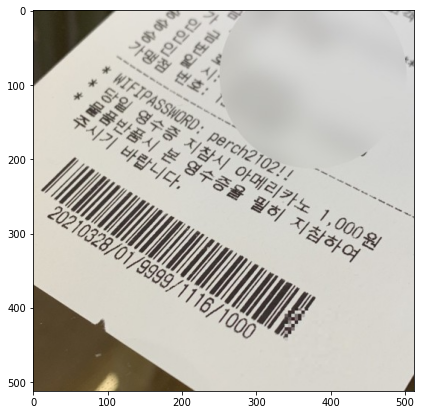

In [122]:
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7,7))
plt.imshow(image)

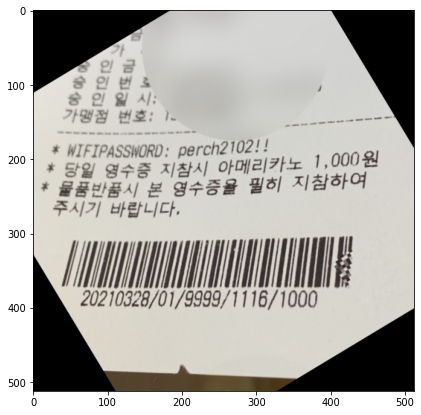

In [124]:
func_list = [
    A.Rotate(p=1.0, limit=[degree,degree],
    border_mode=cv2.BORDER_CONSTANT
    ),
]

alb_transform = A.Compose(func_list)

transformed = alb_transform(image=image)
pil_image=Image.fromarray(transformed["image"])
plt.figure(figsize=(7,7))
plt.imshow(transformed["image"])

In [125]:
ann_dict2 = get_ann(pil_image,"http://118.222.179.32:30000/ocr/")
ann_dict2

{'ocr': {'word': [{'points': [[107, 47], [121, 47], [121, 61], [107, 61]],
    'orientation': 'Horizontal',
    'text': '가'},
   {'points': [[122, 69], [136, 69], [136, 86], [122, 86]],
    'orientation': 'Horizontal',
    'text': '금'},
   {'points': [[90, 69], [106, 69], [106, 87], [90, 87]],
    'orientation': 'Horizontal',
    'text': '인'},
   {'points': [[88, 85], [102, 88], [98, 110], [84, 107]],
    'orientation': 'Horizontal',
    'text': '인'},
   {'points': [[120, 87], [133, 91], [127, 111], [114, 107]],
    'orientation': 'Horizontal',
    'text': '번'},
   {'points': [[55, 90], [69, 90], [69, 107], [55, 107]],
    'orientation': 'Horizontal',
    'text': '승'},
   {'points': [[112, 108], [126, 108], [126, 128], [112, 128]],
    'orientation': 'Horizontal',
    'text': '일'},
   {'points': [[50, 110], [63, 110], [63, 127], [50, 127]],
    'orientation': 'Horizontal',
    'text': '승'},
   {'points': [[81, 110], [95, 110], [95, 128], [81, 128]],
    'orientation': 'Horizontal',
   